In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
os.chdir(r"C:\Users\reece\Downloads\BANA 7360")
os.getcwd()

'C:\\Users\\reece\\Downloads\\BANA 7360'

In [2]:
# Decomposition 
# isolate seasonality/trends from time series data
# St = Seasonal component
# Tt = Trend/Cycle component 
# Rt = Remainder component or noise
# Addicitve decomposition.
# Multiplication decomposition

In [3]:
# Classical decomposition 
df = pd.read_csv('elecequip.csv',index_col=0,parse_dates=True)
df.head()

,elecequip
month,
1996-01-01,79.43
1996-02-01,75.86
1996-03-01,86.40
1996-04-01,72.67
1996-05-01,74.93


<Axes: xlabel='month'>

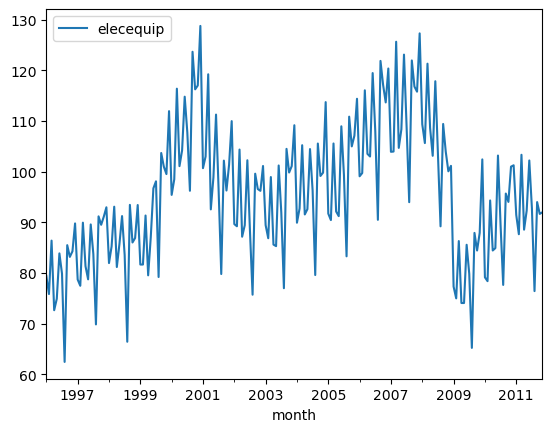

In [4]:
df.plot()
# variance does not change, good for addictive decomposition 

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import DecomposeResult

In [41]:
plt.rcParams['figure.figsize'] = [14.0,14.0]

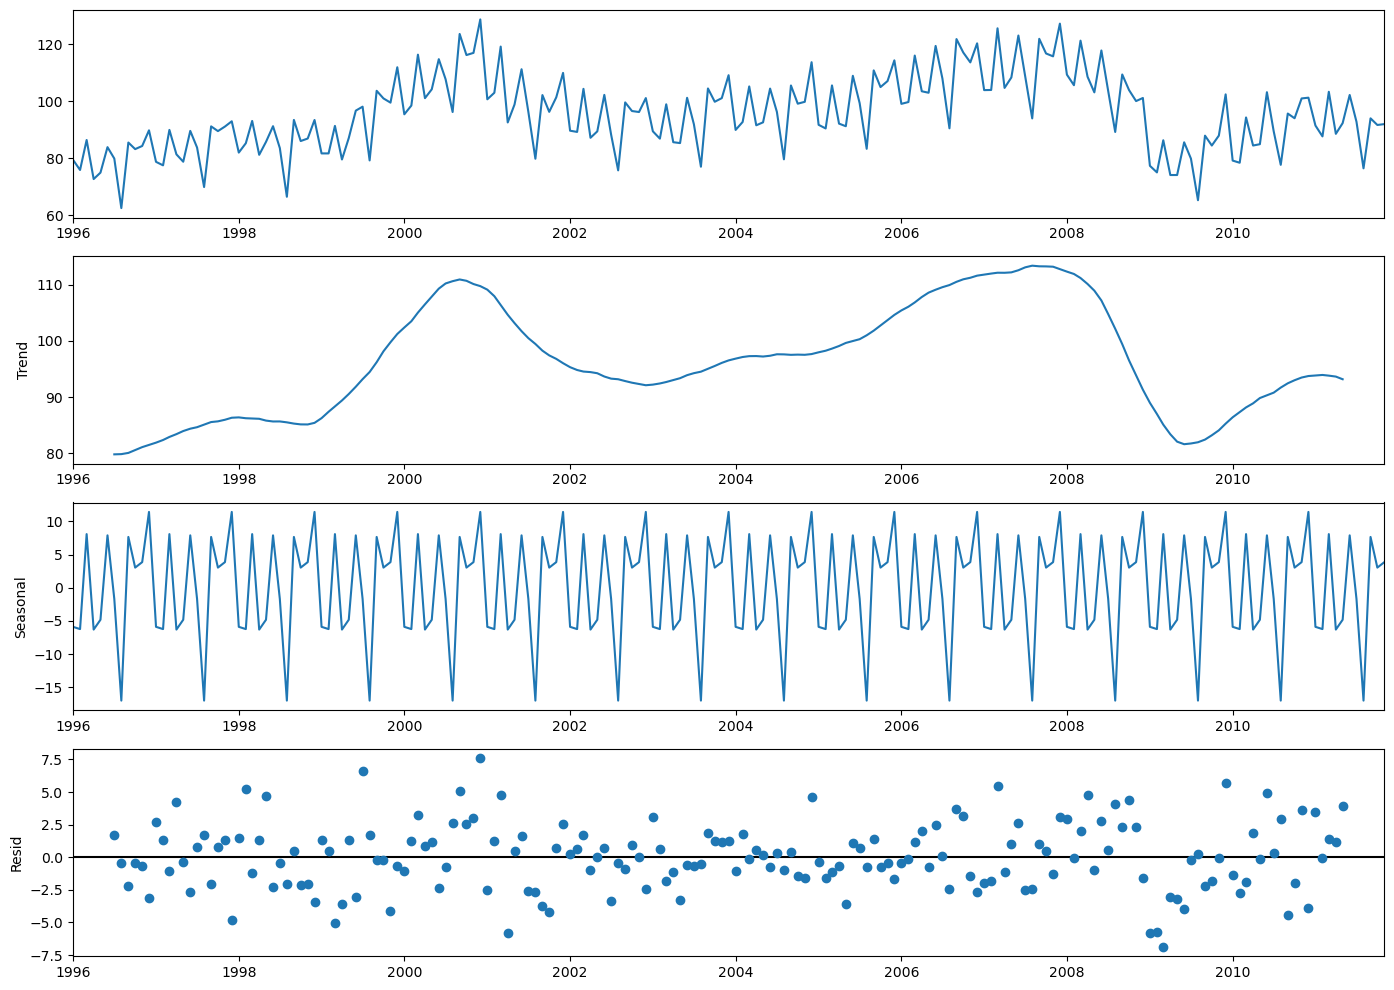

In [10]:
decomposition = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition.plot()

In [11]:
df

,elecequip
month,
1996-01-01,79.43
1996-02-01,75.86
1996-03-01,86.40
1996-04-01,72.67
1996-05-01,74.93
...,...
2011-07-01,92.80
2011-08-01,76.44
2011-09-01,94.00


In [12]:
df['Observed'] = decomposition.observed
df['Trend'] = decomposition.trend # short coming of classical decomposition 
df['Seasonal'] = decomposition.seasonal
df['Resid'] = decomposition.resid
df

,elecequip,Observed,Trend,Seasonal,Resid
month,,,,,
1996-01-01,79.43,79.43,NaN,-5.884752,NaN
1996-02-01,75.86,75.86,NaN,-6.224113,NaN
1996-03-01,86.40,86.40,NaN,8.072137,NaN
1996-04-01,72.67,72.67,NaN,-6.296363,NaN
1996-05-01,74.93,74.93,NaN,-4.817280,NaN
...,...,...,...,...,...
2011-07-01,92.80,92.80,NaN,-1.685085,NaN
2011-08-01,76.44,76.44,NaN,-16.986641,NaN
2011-09-01,94.00,94.00,NaN,7.642887,NaN


In [18]:
df.to_excel('Addictive_Composition_Classical.xlsx')

In [24]:
df = pd.read_csv('oneColumnData.csv',index_col=0,parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

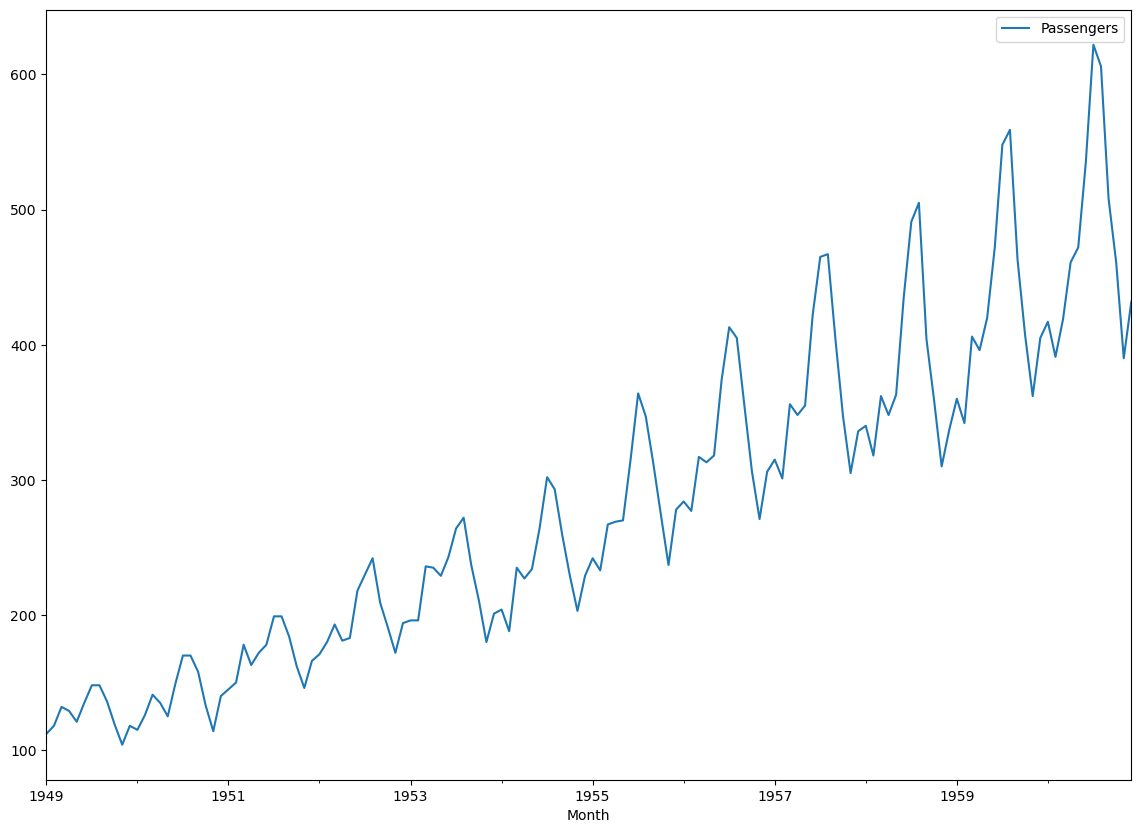

In [25]:
df.plot()

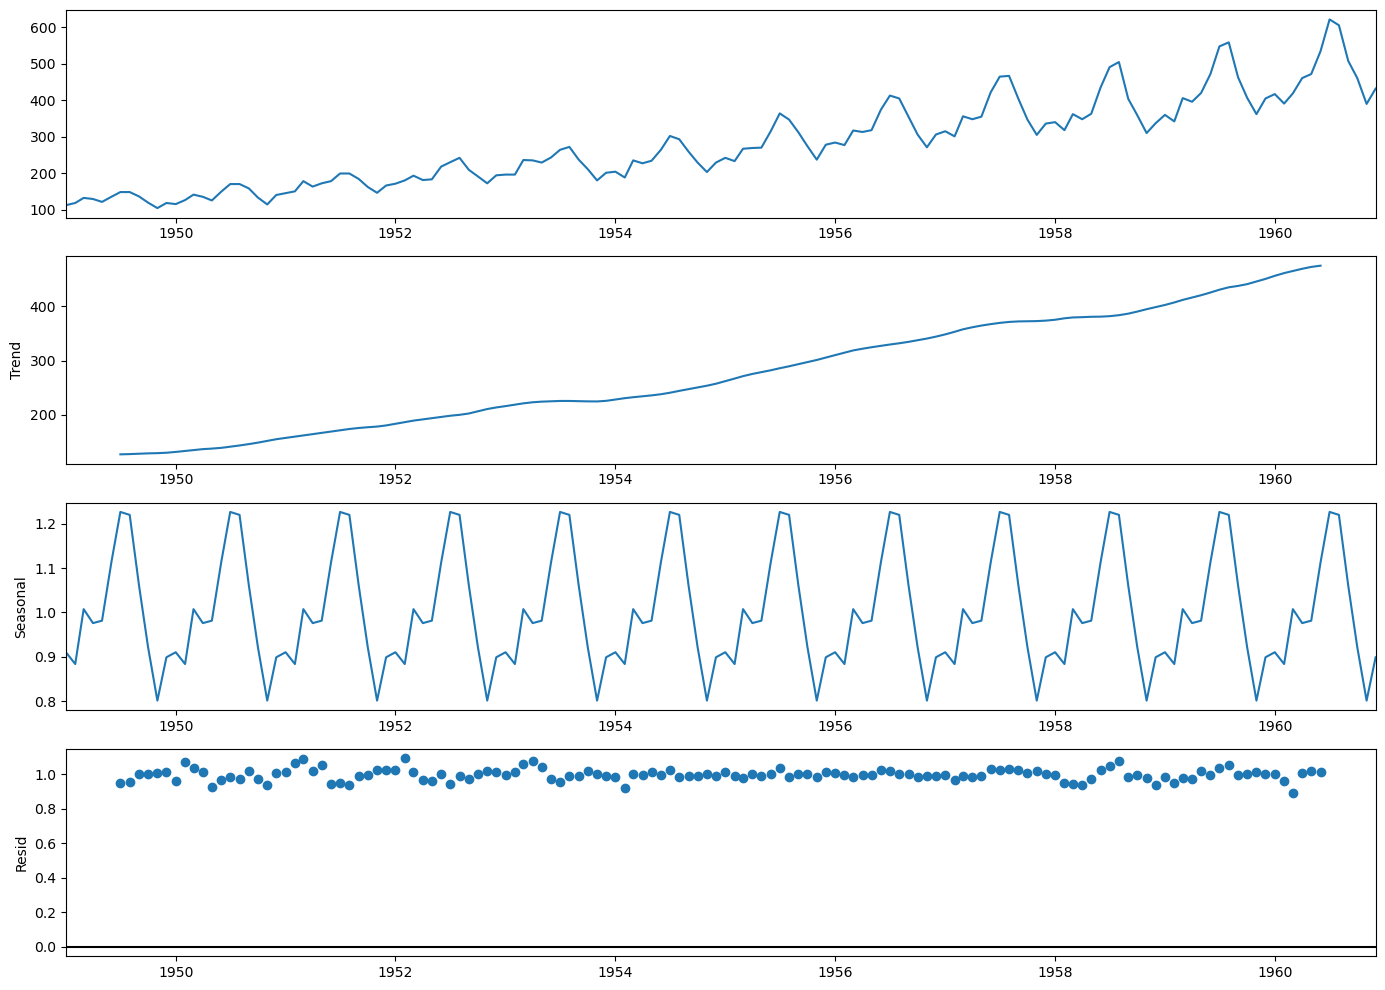

In [26]:
decomposition = sm.tsa.seasonal_decompose(df,model='multiplicative')
fig = decomposition.plot()

In [27]:
df['Observed'] = decomposition.observed
df['Trend'] = decomposition.trend # short coming of classical decomposition 
df['Seasonal'] = decomposition.seasonal
df['Resid'] = decomposition.resid
df

,Passengers,Observed,Trend,Seasonal,Resid
Month,,,,,
1949-01-01,112,112.0,NaN,0.910230,NaN
1949-02-01,118,118.0,NaN,0.883625,NaN
1949-03-01,132,132.0,NaN,1.007366,NaN
1949-04-01,129,129.0,NaN,0.975906,NaN
1949-05-01,121,121.0,NaN,0.981378,NaN
...,...,...,...,...,...
1960-08-01,606,606.0,NaN,1.219911,NaN
1960-09-01,508,508.0,NaN,1.060492,NaN
1960-10-01,461,461.0,NaN,0.921757,NaN


In [29]:
df.to_excel('Multiplicative_Composition_Classical.xlsx')

In [30]:
# STL Decomposition 
# Handles seasonal type
# user control rate of change
# its robost 

In [32]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
df = pd.read_csv('elecequip.csv',index_col=0,parse_dates=True)
df

,elecequip
month,
1996-01-01,79.43
1996-02-01,75.86
1996-03-01,86.40
1996-04-01,72.67
1996-05-01,74.93
...,...
2011-07-01,92.80
2011-08-01,76.44
2011-09-01,94.00


<Axes: xlabel='month'>

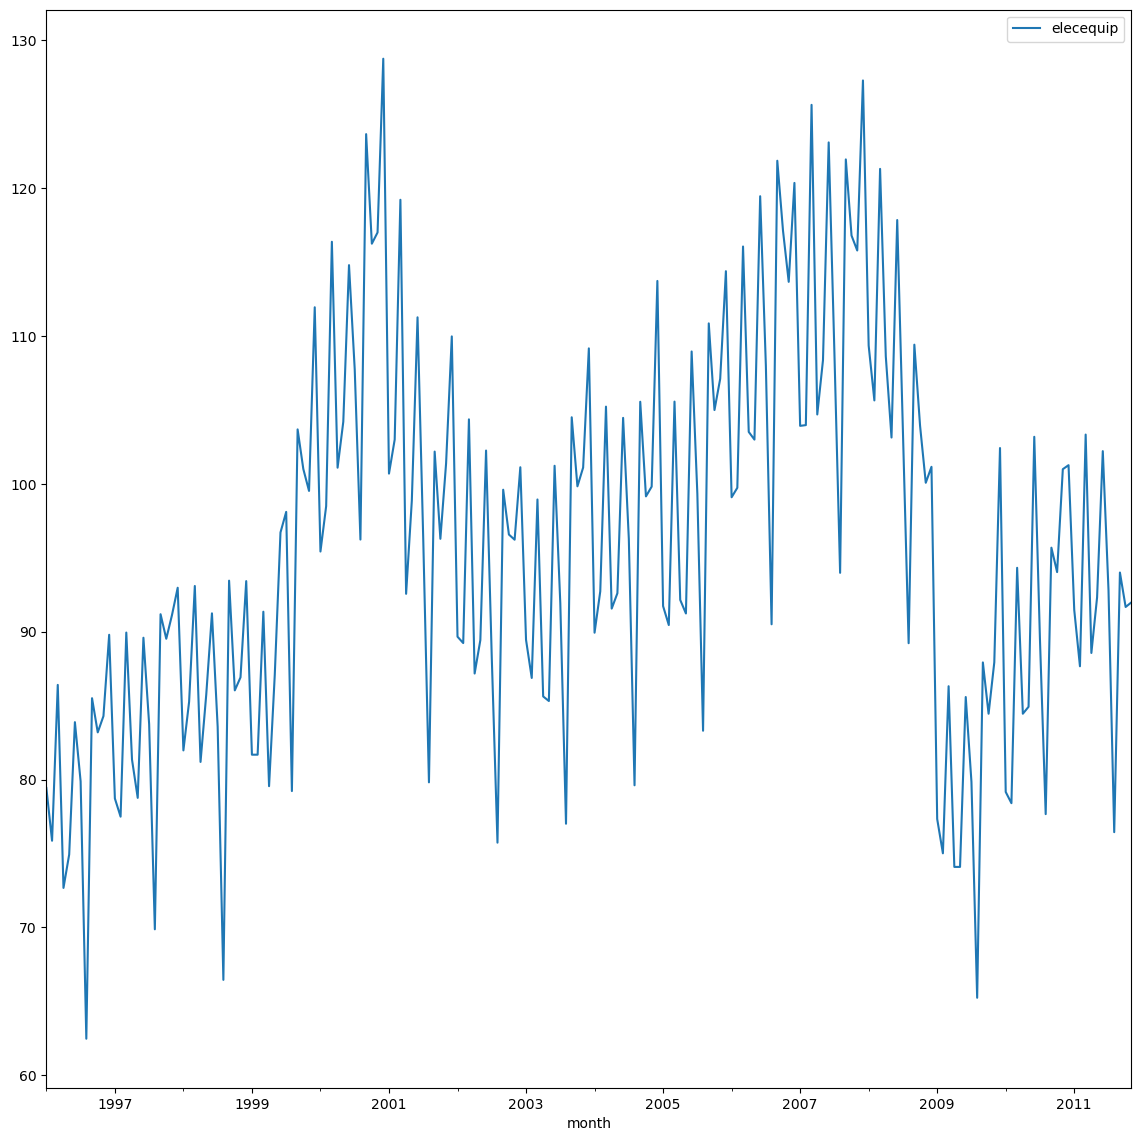

In [44]:
df.plot()

In [45]:
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01',
               '2011-10-01', '2011-11-01'],
              dtype='datetime64[ns]', name='month', length=191, freq=None)

In [46]:
df.shape

(191, 1)

In [55]:
# STL hint, pay attention to frequency
df.index.freq = 'MS'
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01',
               '2011-10-01', '2011-11-01'],
              dtype='datetime64[ns]', name='month', length=191, freq='MS')

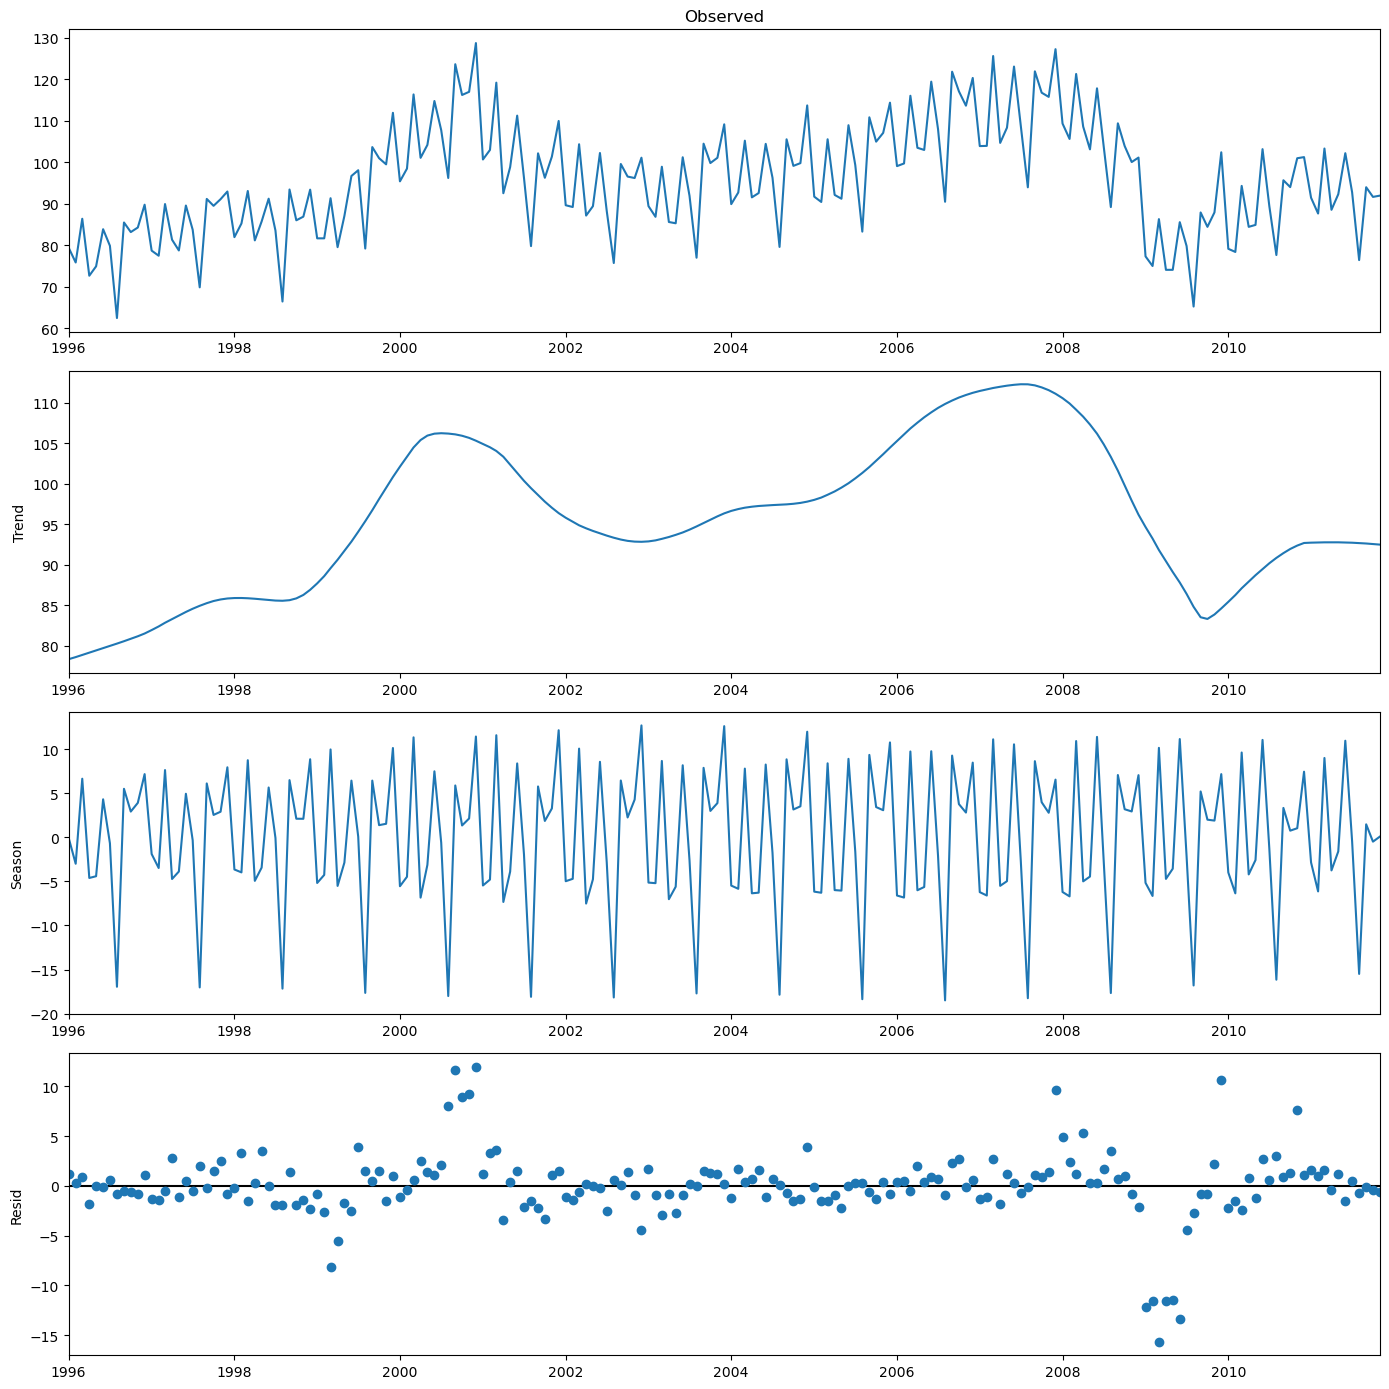

In [48]:
model = STL(df,robust=True)
fit = model.fit()
fit.plot()
plt.show()

In [51]:
df['Observed'] = fit.observed
df['Trend'] = fit.trend # short coming of classical decomposition 
df['Seasonal'] = fit.seasonal
df['Resid'] = fit.resid
df

,elecequip,Observed,Trend,Seasonal,Resid
month,,,,,
1996-01-01,79.43,79.43,78.327126,-0.069126,1.172000
1996-02-01,75.86,75.86,78.586462,-3.009905,0.283442
1996-03-01,86.40,86.40,78.851813,6.635605,0.912581
1996-04-01,72.67,72.67,79.122810,-4.619558,-1.833251
1996-05-01,74.93,74.93,79.398711,-4.421376,-0.047335
...,...,...,...,...,...
2011-07-01,92.80,92.80,92.723805,-0.452860,0.529055
2011-08-01,76.44,76.44,92.680917,-15.499426,-0.741491
2011-09-01,94.00,94.00,92.626707,1.464236,-0.090943


In [53]:
df.to_excel('STL_Decomposition2.xlsx')

In [58]:
# using decomposition for forecasting 
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [59]:
ARIMA = ARIMA

In [60]:
config = {}

In [61]:
stlf_arima = STLForecast(df,ARIMA,model_kwargs=config)
fit_arima = stlf_arima.fit()
fit_arima.result

In [62]:
fcast_arima = fit_arima.forecast(24)

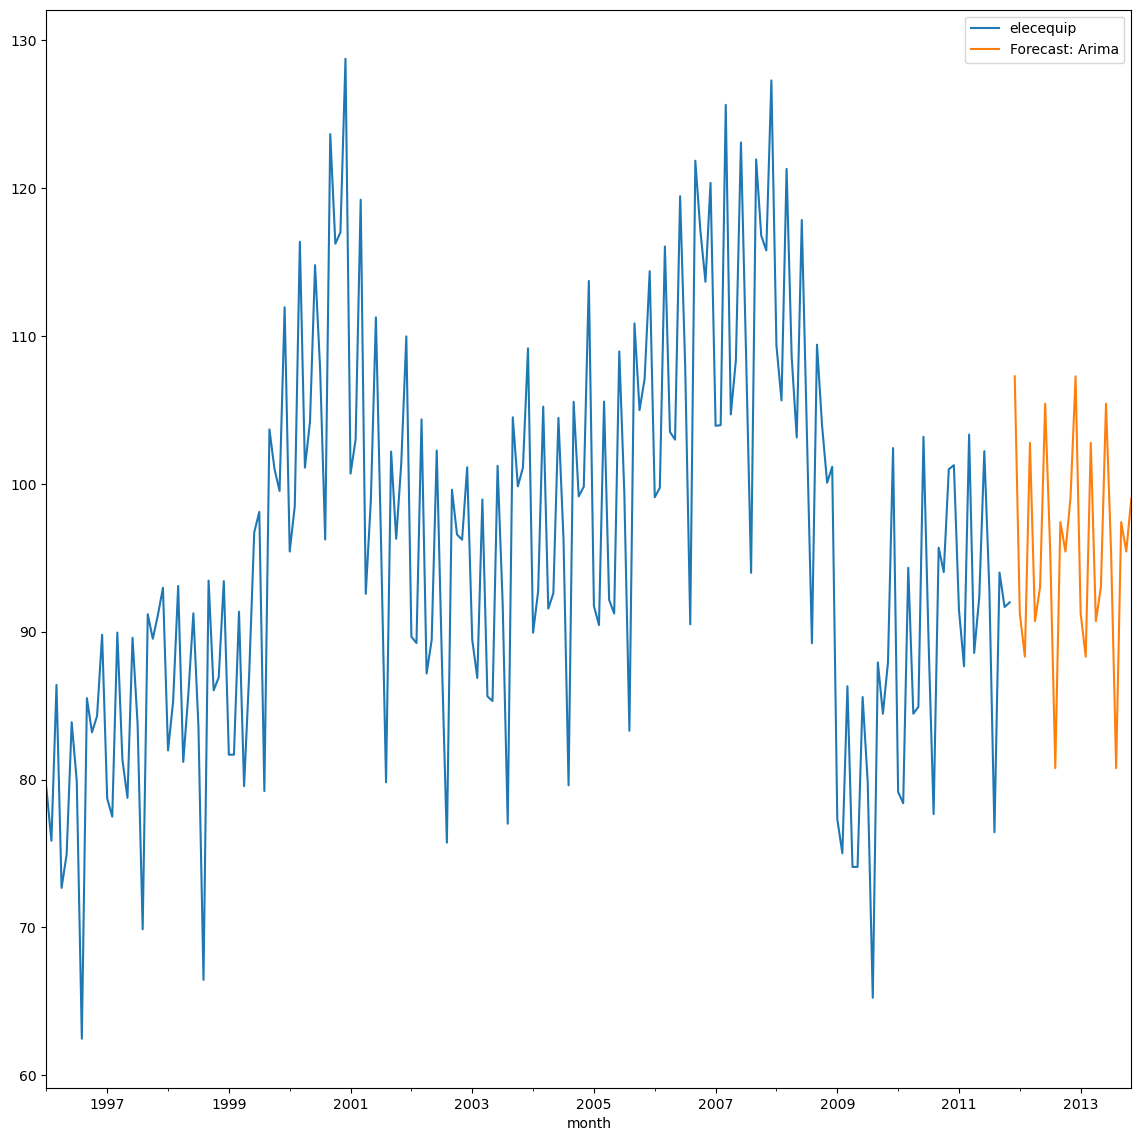

In [63]:
df.plot(label='Actual')
fcast_arima.plot(label='Forecast: Arima')
plt.legend()
plt.show()

In [65]:
from statsmodels.tsa.statespace import exponential_smoothing
Es = exponential_smoothing.ExponentialSmoothing
config = {'trend':True}
stlf = STLForecast(df,Es,model_kwargs=config)
fit_es = stlf.fit()
fcast_es = fit_es.forecast(24)

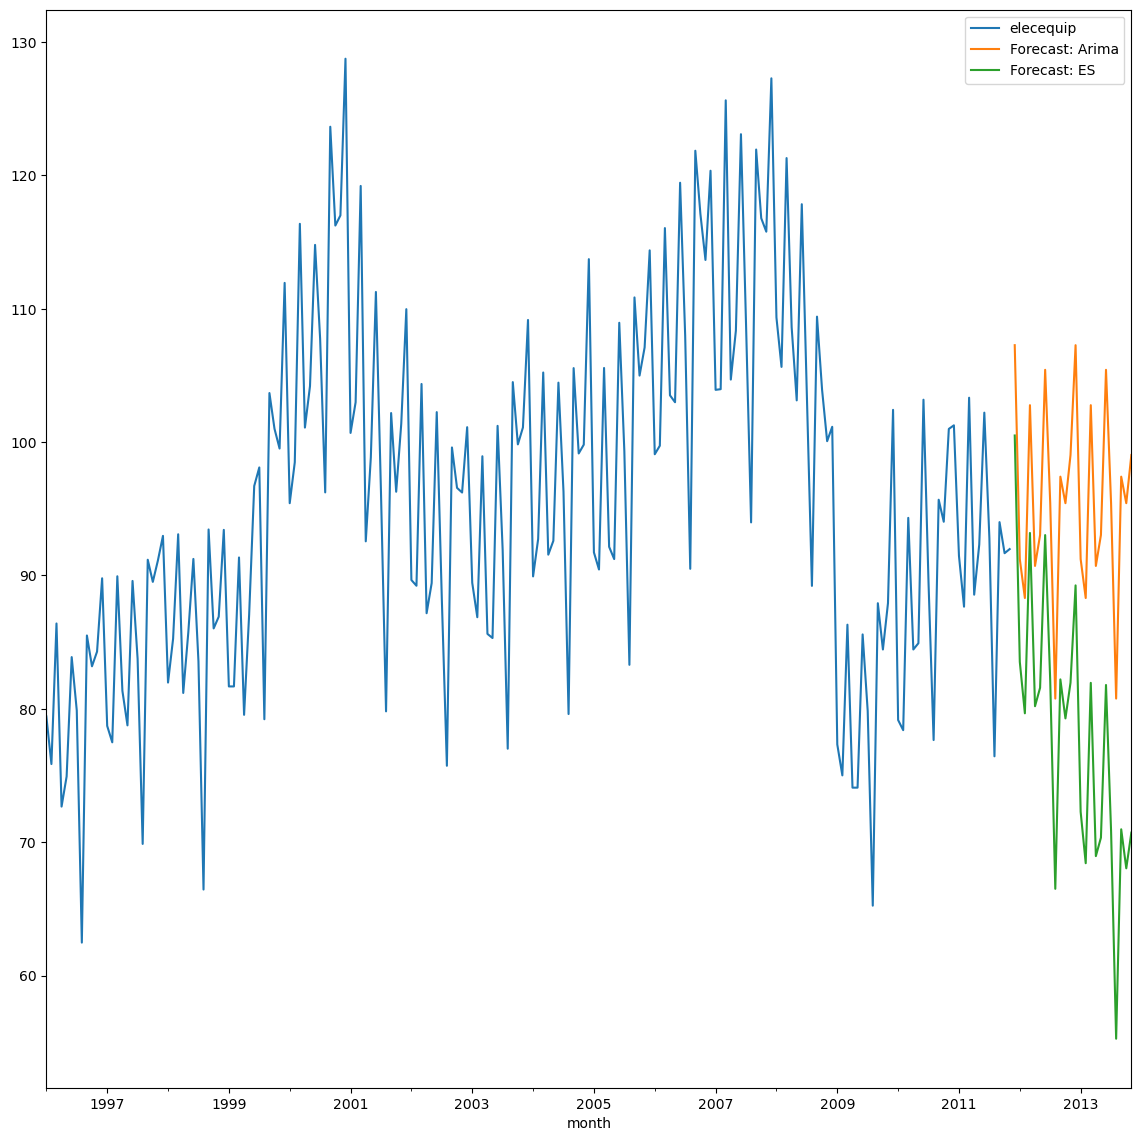

In [66]:
df.plot(label='Actual')
fcast_arima.plot(label='Forecast: Arima')
fcast_es.plot(label='Forecast: ES')
plt.legend()
plt.show()

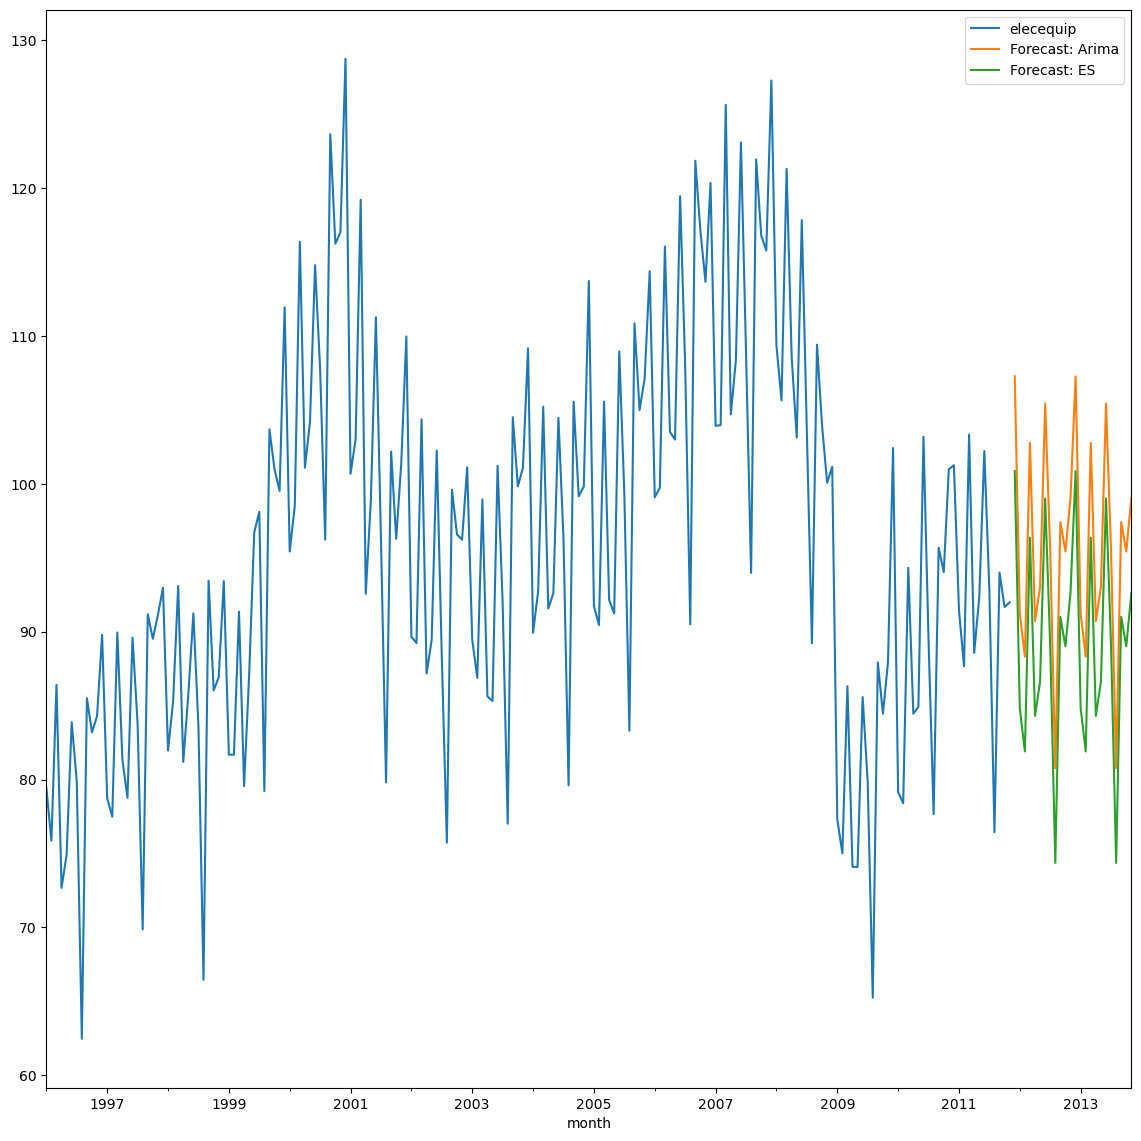

In [68]:
Es = exponential_smoothing.ExponentialSmoothing
config = {'trend':False}
stlf = STLForecast(df,Es,model_kwargs=config)
fit_es = stlf.fit()
fcast_es = fit_es.forecast(24)
df.plot(label='Actual')
fcast_arima.plot(label='Forecast: Arima')
fcast_es.plot(label='Forecast: ES')
plt.legend()
plt.show()

In [71]:
from statsmodels.tsa.ar_model import AutoReg
AR = AutoReg
config = {"lags":3}
stlf_ar = STLForecast(df,AR,model_kwargs=config)
fit_ar = stlf_ar.fit()
fcast_ar = fit_ar.forecast(24)

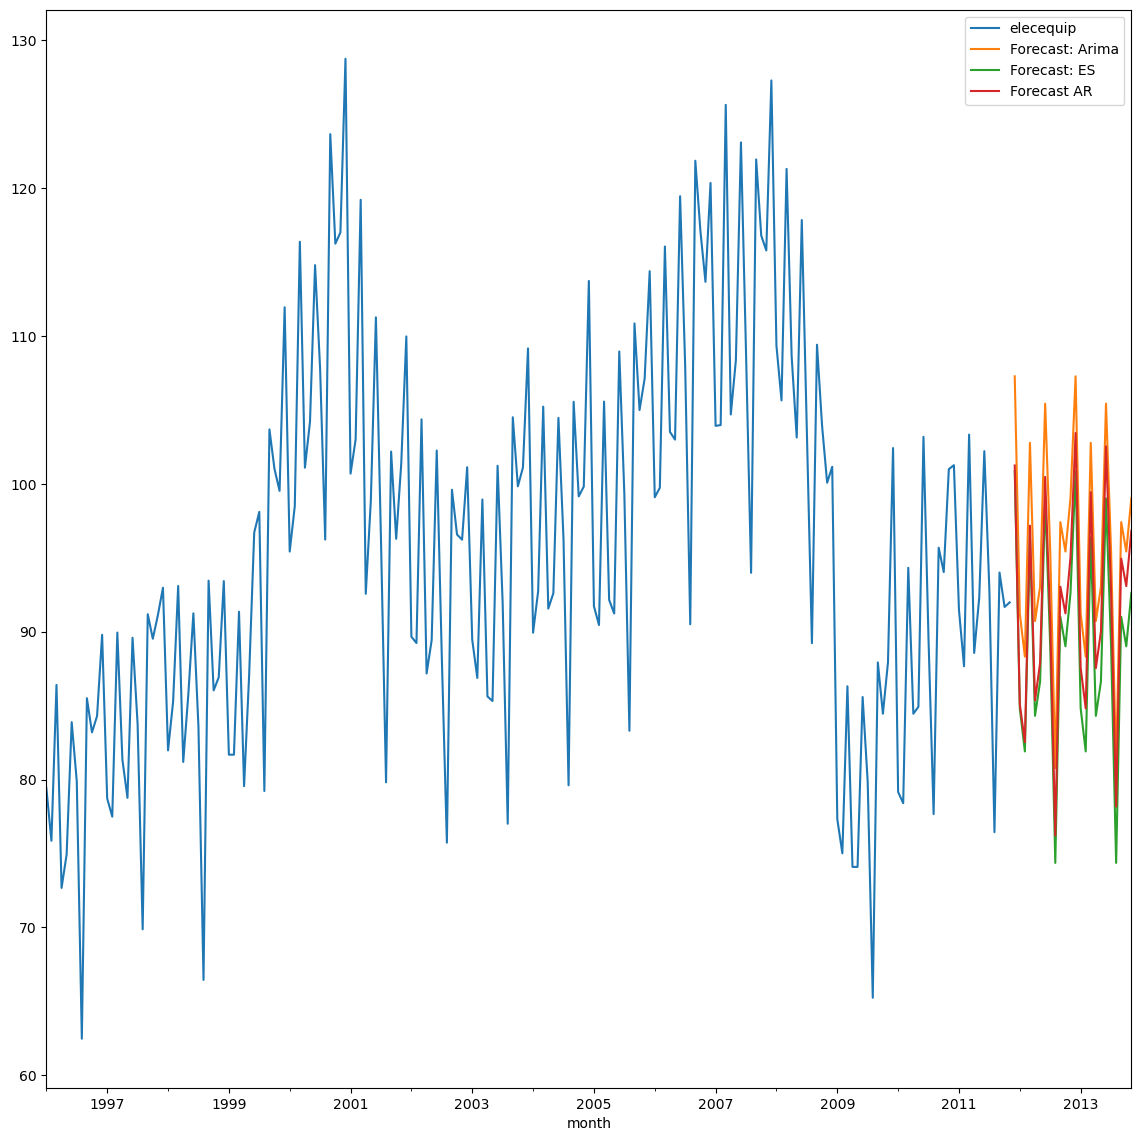

In [72]:
df.plot(label='Actual')
fcast_arima.plot(label='Forecast: Arima')
fcast_es.plot(label='Forecast: ES')
fcast_ar.plot(label='Forecast AR')
plt.legend()
plt.show()